<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;text-align: center;">
<br><a href="https://www.youtube.com/watch?v=NUXdtN1W1FE&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=12"><b> Source</b></a></div>

# 1. Linear Regression Analysis
***

### Types of Linear Regression

    - There are different typs of linear regression
![](pic/v12/1s.png)

### How to understande Linear Regression
- Linear Regression is a statistical model used to predict the relationship between independent and dependent variables
![](pic/v12/4s.png)

#### Regression equation
- The simplest form of a simple linear regression equation with one dependent and one independent variable is represented by:
![](pic/v12/5s.png)

#### Prediction using the Regression line
Example: Based on the amount of rainfall, how much would be the crop yield?
- INDEPENDENT VARIABLE as X (in our case it would be rainfall)
- DEPENDENT VARIABLE as Y (in our case it would be crop yield)
![](pic/v12/6s.png)

#### Intuition behind the Regression line
- Lets consider a sample dataset with 5 rows and find out how to draw the regression line:
![](pic/v12/7s.png)

- Calculate the mean of X an Y and plot the values
![](pic/v12/8s.png)

- Drawing the equation of the Regression line
![](pic/v12/9s.png)

- Now we can find out the predicted values of Y for corresponding values of X using the linear equation where m = 0.6 and c = 2.2
![](pic/v12/10s.png)

#### Finding the best fit line
Minimizing the Distance!
![](pic/v12/11s.png)

#### Application of linear regression can be various:
- to determine economic growth of a country or state
- to predict GDP of a country
- to estimate the number of houses a builder would sell and at waht price in the coming time
- to predict the number of runs a player would score in the coming matches based on previous preformance
- and many more

Explanation of simple and multiple regression
![](pic/v12/2s.png)

###  Linear regression - demo example

#### TASK: estemating price of a house

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# DATASET
house_price=[245,312,279,308,199,219,405,324,319,255]
size=[1400,1600,1700,1875,1100,1550,2350,2450,1425,1700]

# reshape the input to your regression
size2=np.array(size).reshape((-1,1))
print(size2)

[[1400]
 [1600]
 [1700]
 [1875]
 [1100]
 [1550]
 [2350]
 [2450]
 [1425]
 [1700]]


In [2]:
# by using fit module in linear regression, user can fit the data frequently an quickly
regr=linear_model.LinearRegression()
regr.fit(size2, house_price)

print("Coefficients:\n", regr.coef_)
print("intercept:\n",regr.intercept_)

Coefficients:
 [0.10976774]
intercept:
 98.24832962138092


In [3]:
size_new=1400
price=(size_new*regr.coef_)+regr.intercept_
print(price)
print(regr.predict([[size_new]]))

[251.92316258]
[251.92316258]


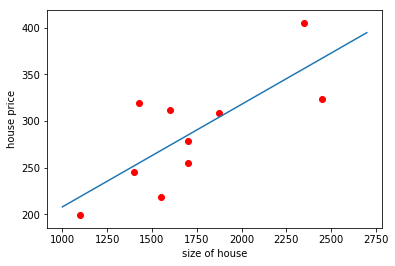

In [4]:
# formula obtained for the trained model
def graph(formula, x_range):
    x=np.array(x_range)
    y=eval(formula)
    plt.plot(x,y)
    
# ploting the prediction line
graph("regr.coef_*x + regr.intercept_", range(1000,2700))
plt.scatter(size, house_price, color="red")
plt.ylabel("house price")
plt.xlabel("size of house")
plt.show()

#### Base on our data we get very useful prediction line!

# 2. Linear regression - practical example
***

### <center> Predicting PROFIT of 1000 companys

![](pic/v12/3s.png)

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv("Data/1000_Companies.csv")
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


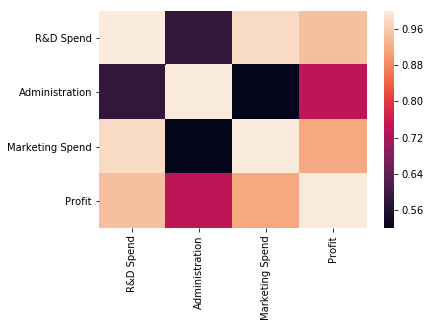

In [7]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\X\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [9]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187362,  94894.67836972, 175680.86725609,
        83411.7304209 , 110571.90200074, 132145.22936439,  91473.37719687,
       164597.05380605,  53222.82667403,  66950.19050991, 150566.43987004,
       126915.20858596,  59337.85971052, 177513.91053059,  75316.28143052,
       118248.14406603, 164574.406999  , 170937.28981069, 182069.11645082,
       118845.0325269 ,  85669.9511223 , 180992.59396141,  84145.08220146,
       105005.83769214, 101233.56772747,  53831.07669094,  56881.41475226,
        68896.39346906, 210040.00765881, 120778.72270894, 111724.87157655,
       101487.90541518, 137959.02649623,  63969.95996745, 108857.91214127,
       186014.72531986, 171442.64130746, 174644.26529203, 117671.49128196,
        96731.37857434, 165452.25779408, 107724.34331255,  50194.54176915,
       116513.89532179,  58632.48986822, 158416.46827608,  78541.48521611,
       159727.66671742, 131137.87699644, 184880.70924514, 174609.08266878,
        93745.66352059,  

In [13]:
# Calculating the Coefficients
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [14]:
# Calculating the Intercept
print(regressor.intercept_)

-51035.22972400437


In [15]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268778

#### Our model is 80% which is not so bad. 